# Section C: Library Implementations

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Preparation (copied from Notebook A)

In [14]:
df = pd.read_csv('Titanic-Dataset.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Logistic Regression

In [15]:
lr_none = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
lr_none.fit(X_train, y_train)
y_pred_none = lr_none.predict(X_test)
y_pred_proba_none = lr_none.predict_proba(X_test)[:, 1]

In [16]:
lr_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_proba_l1 = lr_l1.predict_proba(X_test)[:, 1]

In [17]:
lr_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)
y_pred_proba_l2 = lr_l2.predict_proba(X_test)[:, 1]

## Bagging Approach

In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

## Boosting Methods

In [19]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)
y_pred_proba_ada = ada.predict_proba(X_test)[:, 1]

In [20]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
y_pred_proba_gb = gb.predict_proba(X_test)[:, 1]

In [21]:
xgb = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]

c:\Users\Sahas Induwara\.conda\envs\foml\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:11:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## Comparative Analysis Framework

In [22]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

def plot_roc_curve(y_true, y_pred_proba, title):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    auc = roc_auc_score(y_true, y_pred_proba)
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

def get_metrics(y_true, y_pred, y_pred_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_proba)
    return [accuracy, precision, recall, f1, auc]

### Evaluation

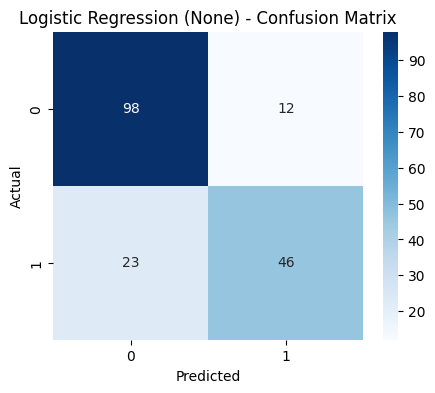

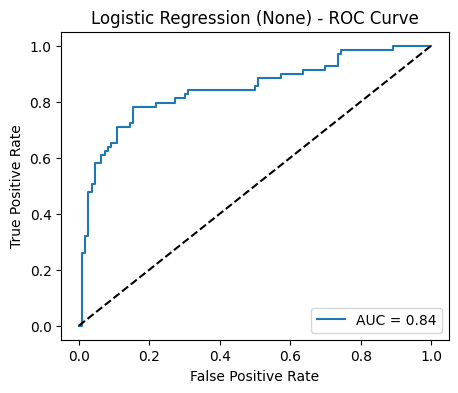

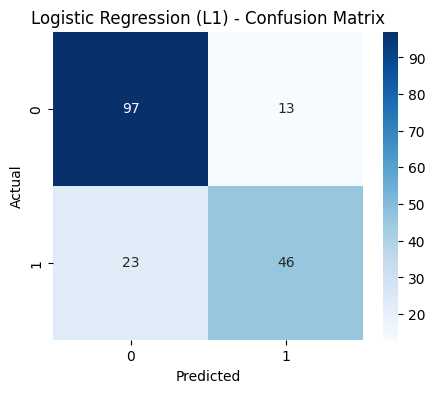

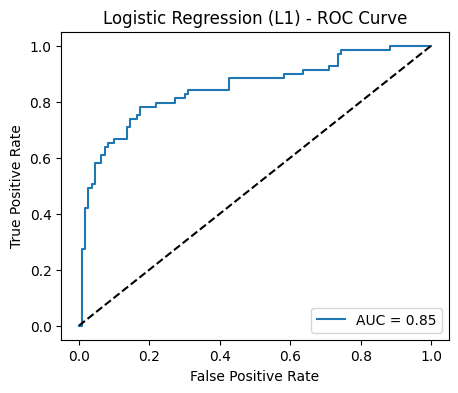

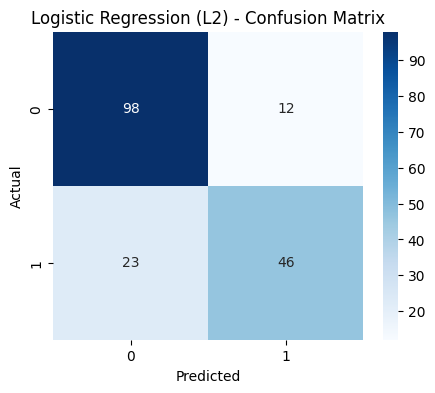

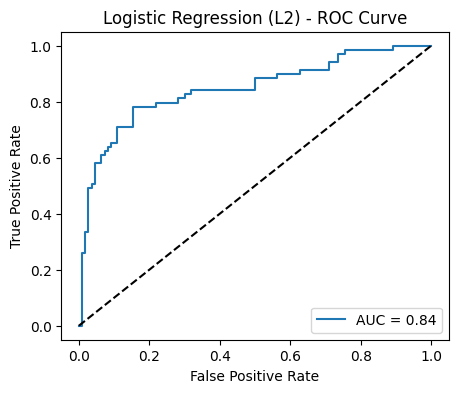

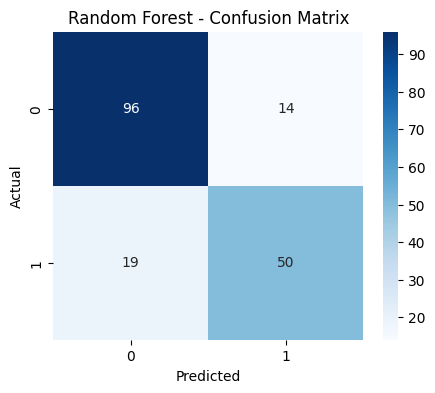

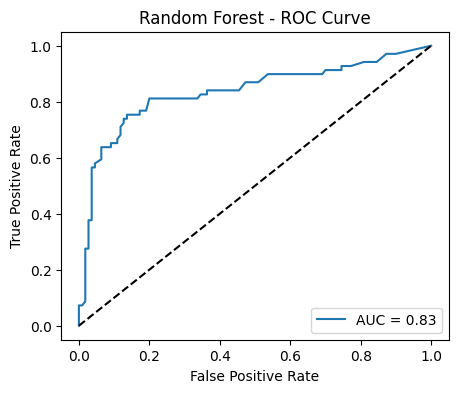

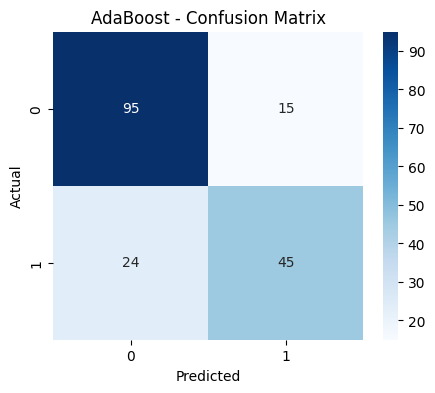

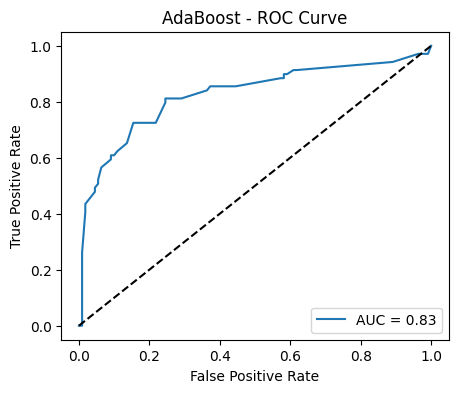

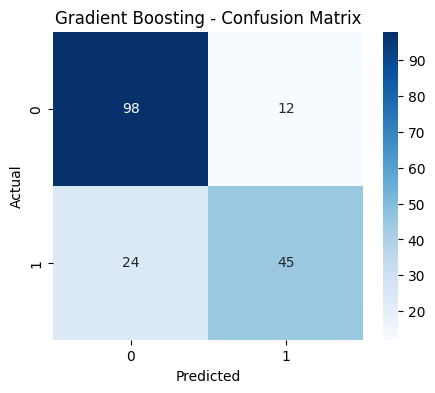

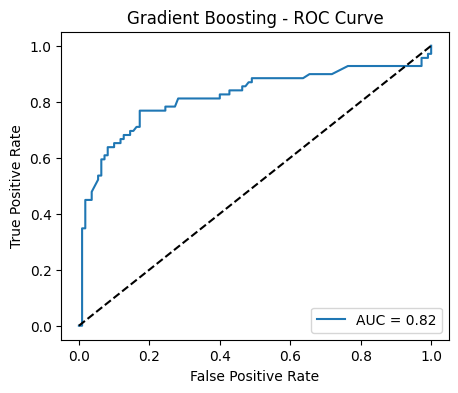

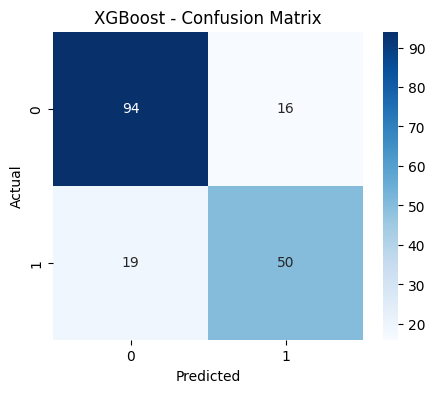

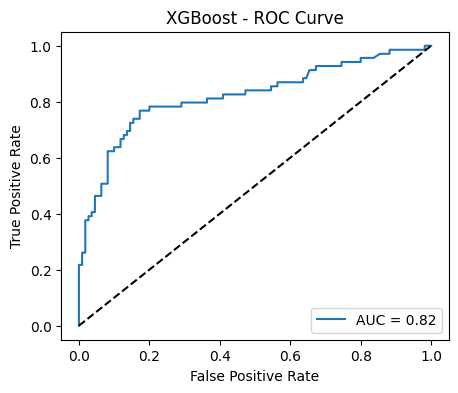

In [23]:
models = {}
models['Logistic Regression (None)'] = (y_pred_none, y_pred_proba_none)
models['Logistic Regression (L1)'] = (y_pred_l1, y_pred_proba_l1)
models['Logistic Regression (L2)'] = (y_pred_l2, y_pred_proba_l2)
models['Random Forest'] = (y_pred_rf, y_pred_proba_rf)
models['AdaBoost'] = (y_pred_ada, y_pred_proba_ada)
models['Gradient Boosting'] = (y_pred_gb, y_pred_proba_gb)
models['XGBoost'] = (y_pred_xgb, y_pred_proba_xgb)

results = []
for name, (y_pred, y_pred_proba) in models.items():
    metrics = get_metrics(y_test, y_pred, y_pred_proba)
    results.append([name] + metrics)
    plot_confusion_matrix(y_test, y_pred, f'{name} - Confusion Matrix')
    plot_roc_curve(y_test, y_pred_proba, f'{name} - ROC Curve')

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
results_df.set_index('Model', inplace=True)

### Comparison Table

In [24]:
print('--- Library Implementation Results ---')
print(results_df)



--- Library Implementation Results ---
                            Accuracy  Precision    Recall  F1 Score       AUC
Model                                                                        
Logistic Regression (None)  0.804469   0.793103  0.666667  0.724409  0.843742
Logistic Regression (L1)    0.798883   0.779661  0.666667  0.718750  0.846904
Logistic Regression (L2)    0.804469   0.793103  0.666667  0.724409  0.844269
Random Forest               0.815642   0.781250  0.724638  0.751880  0.834387
AdaBoost                    0.782123   0.750000  0.652174  0.697674  0.825165
Gradient Boosting           0.798883   0.789474  0.652174  0.714286  0.817918
XGBoost                     0.804469   0.757576  0.724638  0.740741  0.820817
